# PDX Tumors from Ben Drapkin


In [1]:
import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import dropkick as dk

# Preprocessing

## Read in Files

In [2]:
sig_matrix = pd.read_csv('../data/sig_matrix_ParTI.csv', header =0, index_col = 0)
sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)

In [3]:
indir = "../data/loom/melanoma"

samples = ['1614-1','1614-2']
[a1,a2] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Filter and concatenate

In [4]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']
genes = sig_matrix.index

Dropkick is a tool to get rid of empty and low-quality droplets based on ambient reads. It should be applied to each sample separately, so we will apply first and then concantenate the data into one AnnData object.

<div class="alert alert-block alert-success">
<b>Checkpoint:</b> I am using DropKick as opposed to Scanpy filtering to see if it filters out the cells that are in G1 with low Myc. There is a worry that cells are arresting in response to being sequenced.
</div>

In [5]:
batch_categories = ['1','2']
batch_key = 'timepoints'

# adata = a1.concatenate(a2, batch_key='timepoints')
# mb.pp.scanpy_recipe(adata, retain_genes=tfs)
adatas = [a1,a2] 

adata = mb.pp.dropkick_recipe(adatas, verbose=True, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot=False,
                                                retain_genes=[i.capitalize() for i in genes])



Ignoring 13370 genes with zero total counts
Top 71 ambient genes have dropout rates between 0.0 and 0.0 percent:
	['RPS14', 'RPS4X', 'FAU', 'RPL35', 'RPL9', 'RPL24', 'RPL23A', 'RPS2', 'RPS6', 'RPL18', 'RPS8', 'RPS19', 'FTH1', 'YBX1', 'RPL29', 'NPM1', 'RPL6', 'RPL32', 'RPL27', 'RPLP1', 'RPS15A', 'ACTG1', 'RPS21', 'RPL13', 'RPS3A', 'RPS7', 'RPL37A', 'RPL5', 'RPS9', 'ARPC1B', 'RPS5', 'RPS16', 'RPL3', 'RPL27A', 'TMSB10', 'RPLP2', 'RPS11', 'RPL13A', 'RPS3', 'RAC1', 'FTL', 'ATOX1', 'RPLP0', 'CHCHD2', 'RPL19', 'RPS13', 'RPS27A', 'RPS24', 'RPS15', 'RPL35A', 'RPS29', 'RPL8', 'RPL11', 'RPS27', 'RPL7A', 'RPL10', 'RPL36', 'TPT1', 'RPS28', 'RPL21', 'RPL10A', 'RPS18', 'RPL14', 'COX5B', 'PTMA', 'ACTB', 'RPL4', 'GAPDH', 'ATP5E', 'NDUFA4', 'TOMM7']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 585 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.4s finished


Chosen lambda value:
	[0.11570606]
Assigning scores and labels
Done!

Ignoring 13010 genes with zero total counts
Top 66 ambient genes have dropout rates between 0.0 and 0.0 percent:
	['TMSB10', 'RPS2', 'RPL32', 'RPS7', 'RPL8', 'RPS27A', 'RPL21', 'RPL31', 'RPL23A', 'RPL36A', 'C14orf2', 'RPS3', 'RPL37', 'RPL13', 'RPLP1', 'RPS4X', 'RPL7', 'RPL19', 'RPS8', 'RPS24', 'RPL10A', 'RPL3', 'RPL37A', 'RPL5', 'TOMM7', 'RPS27', 'RPS12', 'RPL13A', 'RPS11', 'RPL28', 'RPS5', 'RPS19', 'RPSA', 'NDUFA4', 'RPL34', 'RPS15A', 'RPS14', 'RPL12', 'RPS18', 'TPT1', 'RPLP0', 'RPL6', 'RPS16', 'ACTB', 'RPL29', 'RPL23', 'RPL4', 'FTL', 'RPLP2', 'HSPB1', 'RPS15', 'RPS28', 'CHCHD2', 'RPL35A', 'RPS6', 'RPL36', 'RPS21', 'RPS29', 'FTH1', 'RPL9', 'RPL27A', 'ATP5E', 'ARPC1B', 'EEF1A1', 'RPL11', 'RPS25']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 631 barcodes below first threshold on arcsinh_n_genes_by_counts


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   17.2s finished


Chosen lambda value:
	[0.07894888]
Assigning scores and labels
Done!

Filtered out 15455 genes that are detected 3 counts (spliced).
Ignoring 15455 genes with zero total counts
Top 128 ambient genes have dropout rates between 0.0 and 0.0 percent:
	['EEF1A1', 'RPL5', 'RPS9', 'DDT', 'PTMA', 'RPS11', 'UQCRQ', 'MDH2', 'HSPB1', 'RPLP2', 'ATP5D', 'RPL13A', 'FTL', 'TPI1', 'GAPDH', 'ARPC1B', 'PFDN5', 'RPL27A', 'RPL28', 'RPS8', 'MT-CO3', 'RPS15A', 'MT-CO2', 'RAC1', 'NHP2L1', 'RPS16', 'RPS3A', 'FAU', 'RPL37A', 'RPL3', 'RPL7A', 'PKM', 'UQCRH', 'MRPL21', 'RPL18', 'RPS5', 'RPS15', 'OAZ1', 'LDHA', 'PFN1', 'NACA', 'COX6B1', 'GSTP1', 'RPL23A', 'CD63', 'RPS21', 'ATP5G2', 'NDUFS5', 'RPL30', 'RPL19', 'RPS3', 'LDHB', 'RPS10', 'RPL8', 'RPS6', 'RPL13', 'UBL5', 'EIF3K', 'RPLP0', 'ZNHIT1', 'ATP5E', 'RPL12', 'RPL36', 'RPL35', 'RPL6', 'RPS27', 'PSMA7', 'RPS19', 'ATP6V1F', 'UBB', 'NDUFB2', 'RPL14', 'YBX1', 'RPS28', 'TXN', 'RPL27', 'EIF4A1', 'RPL32', 'RPL9', 'GTF3A', 'RPS2', 'COX5B', 'TMSB10', 'POLR2L', 'TSPO', '

1
2
Found 17283 genes among all datasets
[[0.         0.85191489]
 [0.         0.        ]]
Processing datasets (0, 1)
(2812, 100)


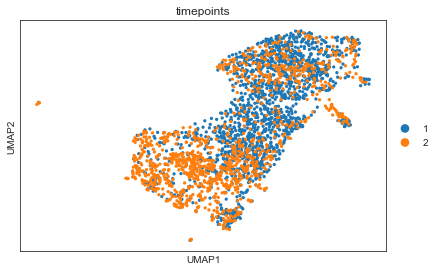

added attributes X_pca_sc and X_umap_sc


In [6]:
mb.pp.scanorama_recipe(adata, correct = True)

## Cell Cycle Regression

calculating cell cycle phase


... storing 'phase' as categorical


-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


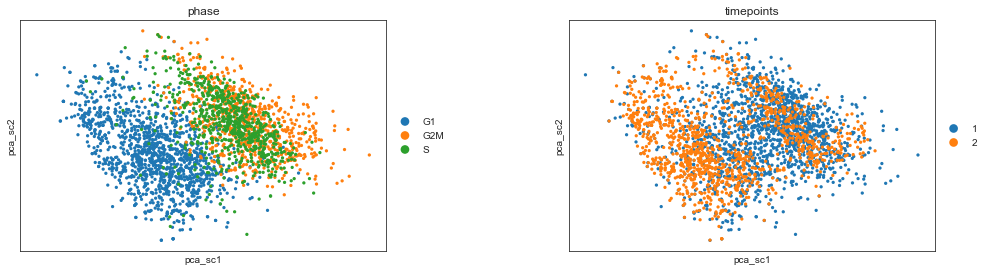

In [7]:
scv.tl.score_genes_cell_cycle(adata)
sc.pl.scatter(adata, color=['phase','timepoints'], basis = 'pca_sc')

<div class="alert alert-block alert-success">
<b>Conclusion:</b> We won't regress out cell cycle because there only seems to be a small dependence on it in PCA space, and we care about which cells are cycling and which are not.
</div>

# Dimensionality Reduction and RNA Velocity

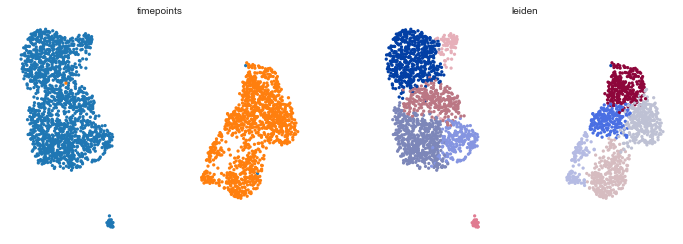

In [8]:
import matplotlib.pyplot as plt
# adata.obsm['X_umap'] = adata.obsm['X_umap_sc']
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
scv.tl.umap(adata)
scv.pl.umap(adata, color = ['timepoints','leiden'], ncols = 3, smooth = True)


In [9]:
adata.write_h5ad('../int/melanoma/adata01.h5ad')

In [4]:
adata = sc.read_h5ad('../int/melanoma/adata01.h5ad')

## Calculating Velocity

In [10]:
scv.pp.moments(adata)
scv.tl.velocity(adata, mode = 'deterministic',groupby='timepoints')
scv.tl.velocity_graph(adata)


Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:03:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


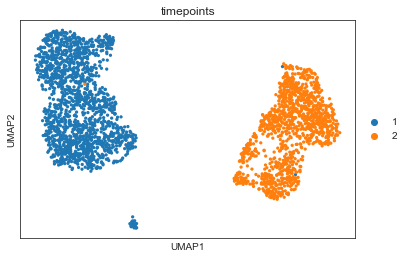

In [11]:
# sc.tl.tsne(adata, random_state=1)
sc.pl.umap(adata, color = 'timepoints')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


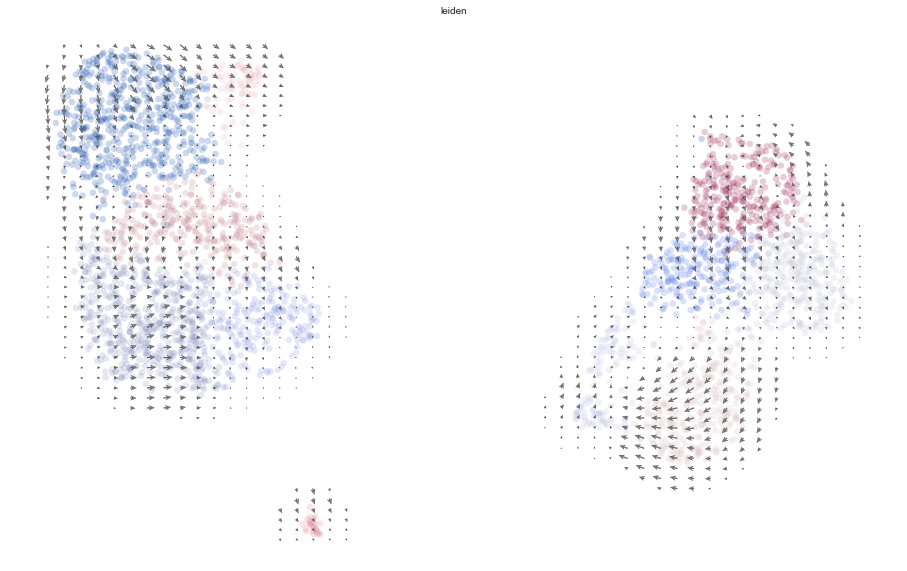

In [12]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', color = ['leiden'], figsize = (16,10),
                                smooth =True)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


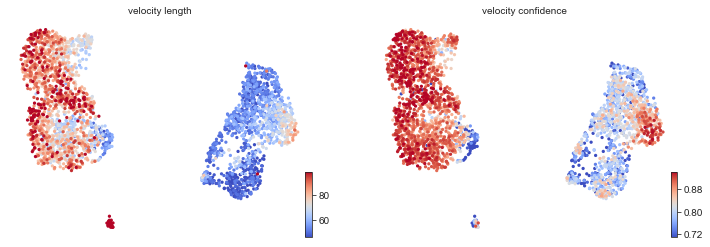

In [13]:
scv.tl.velocity_confidence(adata)

keys = 'velocity_length', 'velocity_confidence'  
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], basis = 'umap')

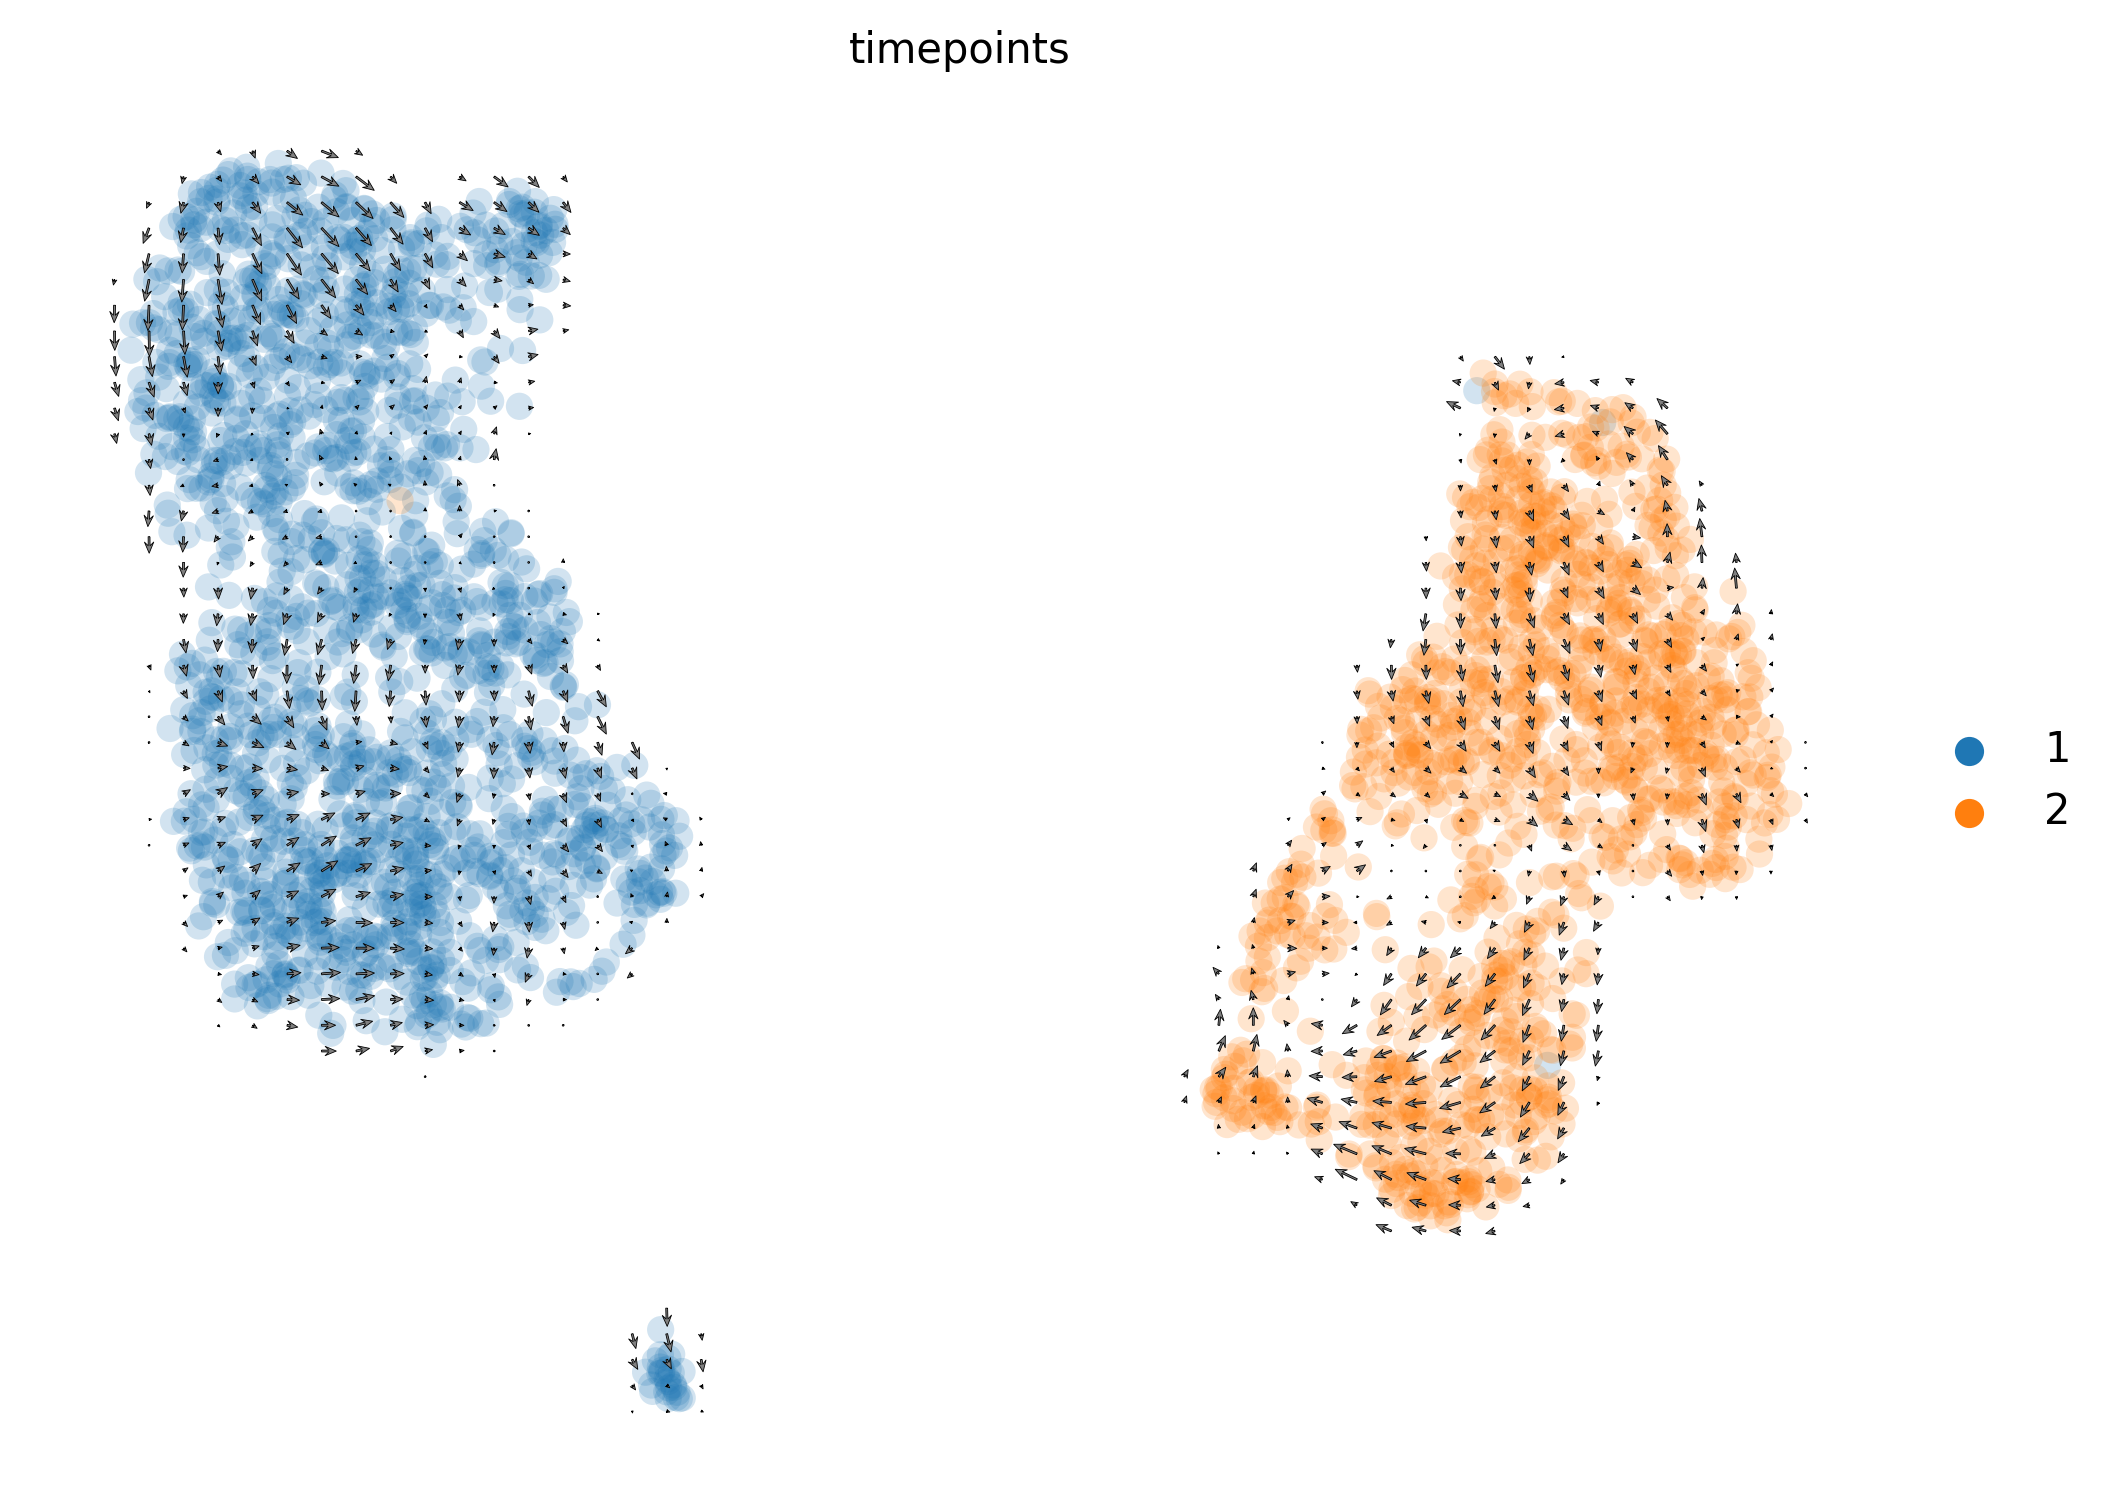

In [35]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', figsize = (8,6), legend_loc = 'on right',color = 'timepoints')


Let's save the data at this point.

In [15]:
adata.write_h5ad('../int/melanoma/adata02.h5ad')

In [2]:
adata = sc.read_h5ad('../int/melanoma/adata02.h5ad')

# Pseudotime and plasticity

We would like to see if we can get the same results as Ireland et al. did for their pseudotime analysis. To run Monocle2, we need the R interface `rpy2`. We'll also use the pseudotime inference within scvelo for comparison.

In [16]:
scv.tl.terminal_states(adata, groupby='timepoints')

computing terminal states
    identified 2 regions of root cells and 1 region of end points  (1).
    identified 3 regions of root cells and 1 region of end points  (2).
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


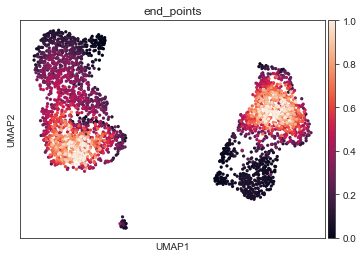

In [17]:
sc.pl.umap(adata, color="end_points")

### Velocity pseudotime

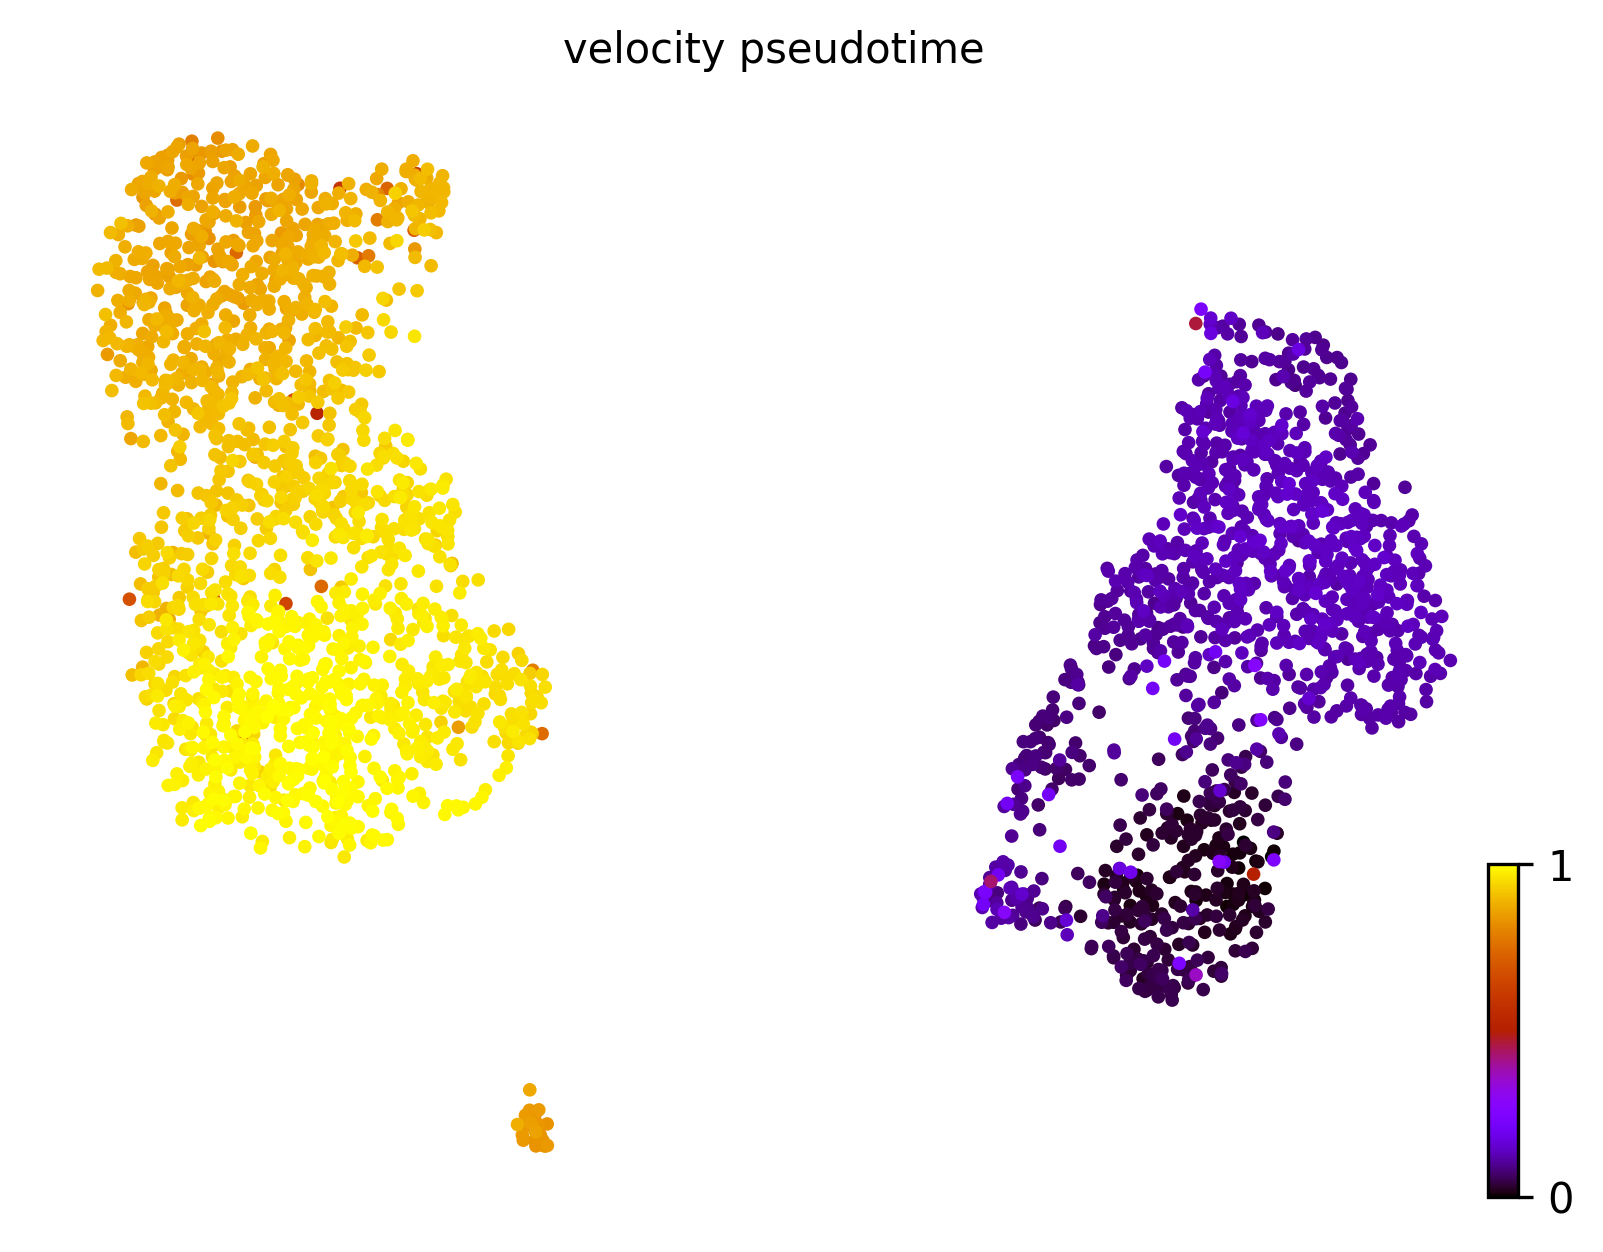

In [36]:
# Velocity pseudotime from scvelo
# scv.tl.terminal_states(adata)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', basis = 'umap')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


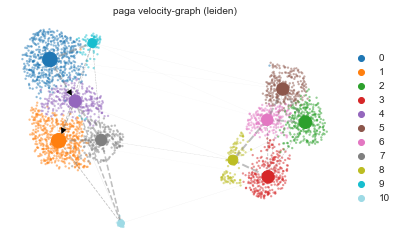

In [19]:
mb.ps.velocity_paga(adata, basis='umap', color='leiden')

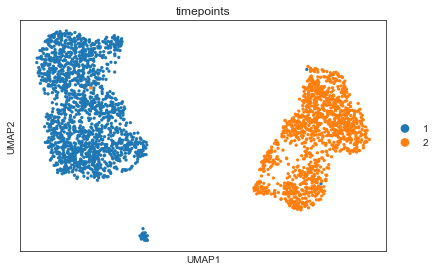

In [20]:
sc.pl.scatter(adata, color = 'timepoints', basis = 'umap')

In [21]:
adata.write_h5ad('../int/melanoma/adata03.h5ad')

In [3]:
adata = sc.read_h5ad('../int/melanoma/adata03.h5ad')

### Calculate plasticity using CTrP

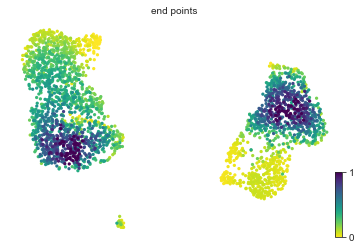

In [22]:
scv.pl.umap(adata, color = 'end_points')

In [37]:
mb.ps.ctrp(adata, self_transitions=False,  adata_dist='X_pca')

computing terminal states
Eigenvalues:  [0.99999404 0.99904424]
(2812, 2)
    identified 2 end points
Dropping absorbing rows for fundamental matrix...
(2752, 2752)
Calculating fate...
Calculating distances...
Calculating inner product...


In [24]:
adata

AnnData object with n_obs × n_vars = 2812 × 17283
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'timepoints', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'ctrp', 'absorbing'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-1', 'dropkick_coef-2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'mean', 'std', 'veloci

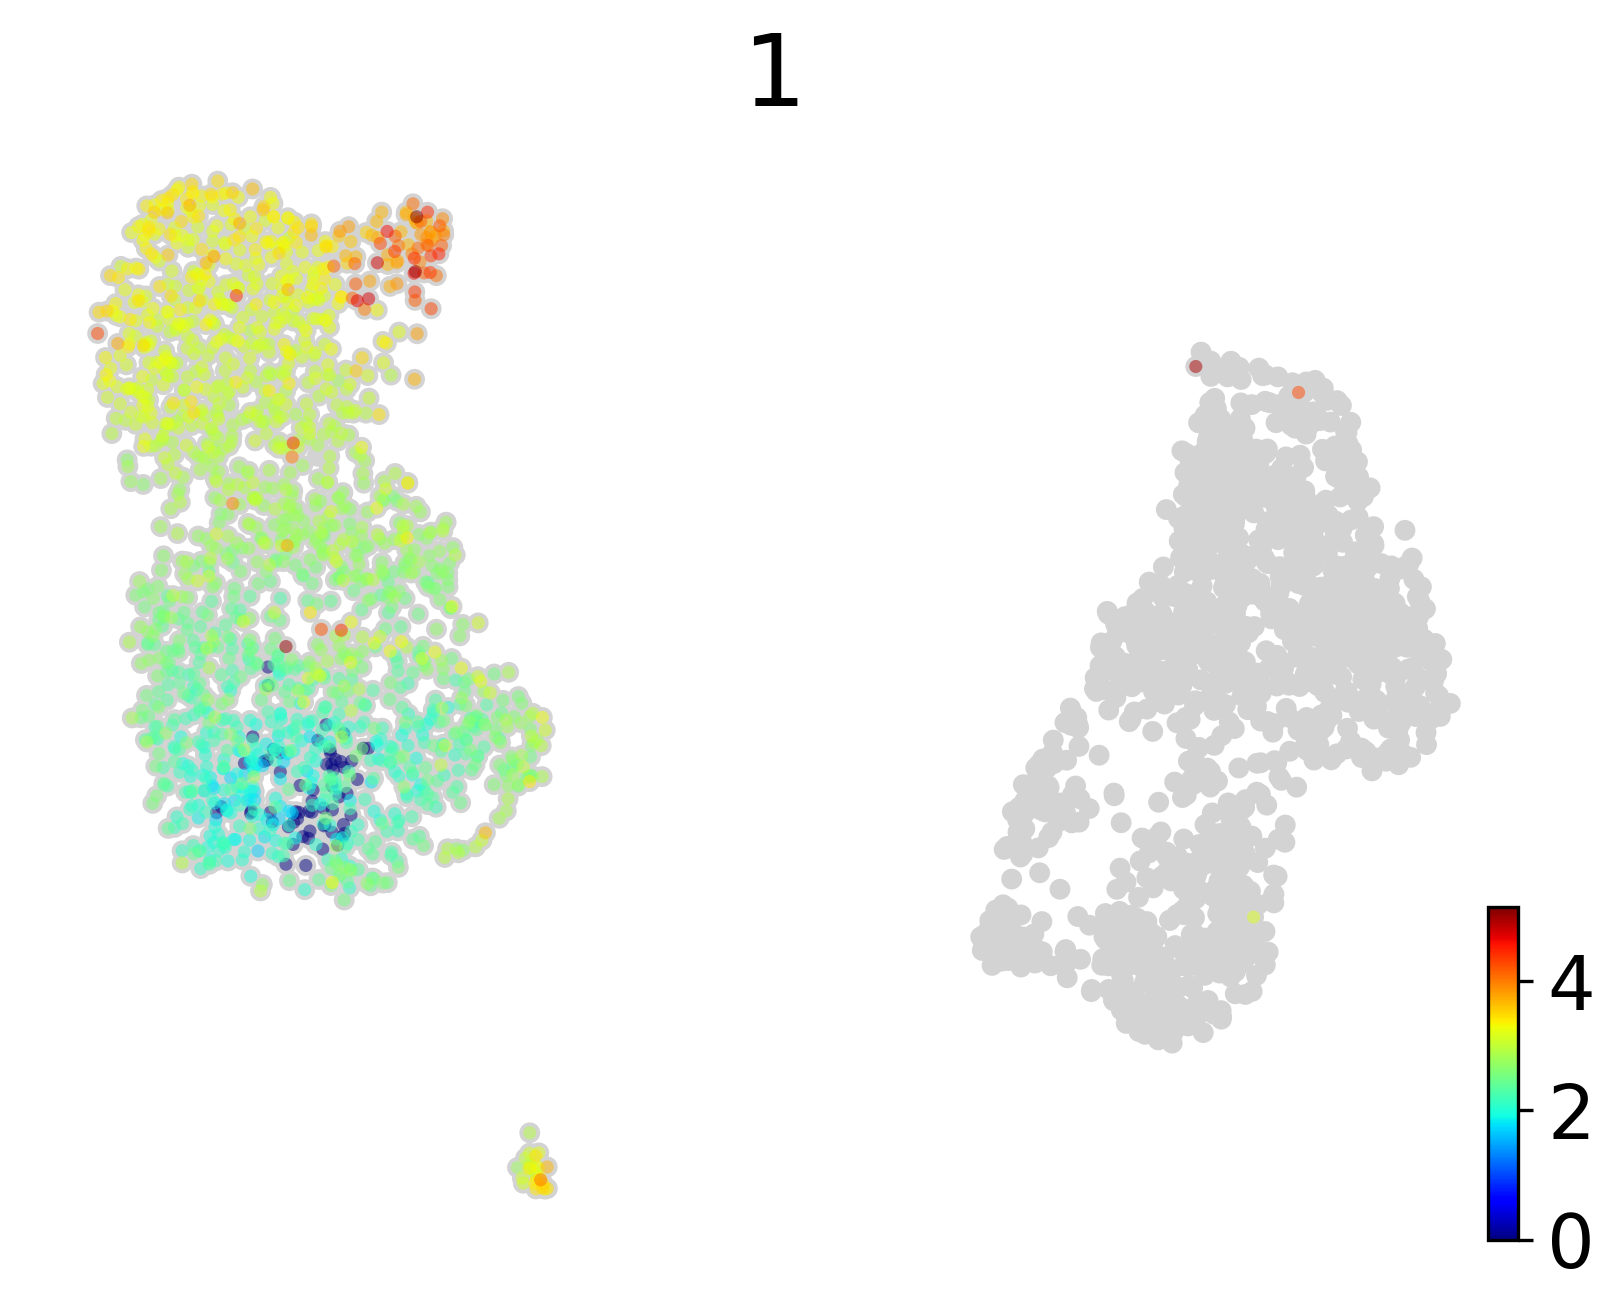

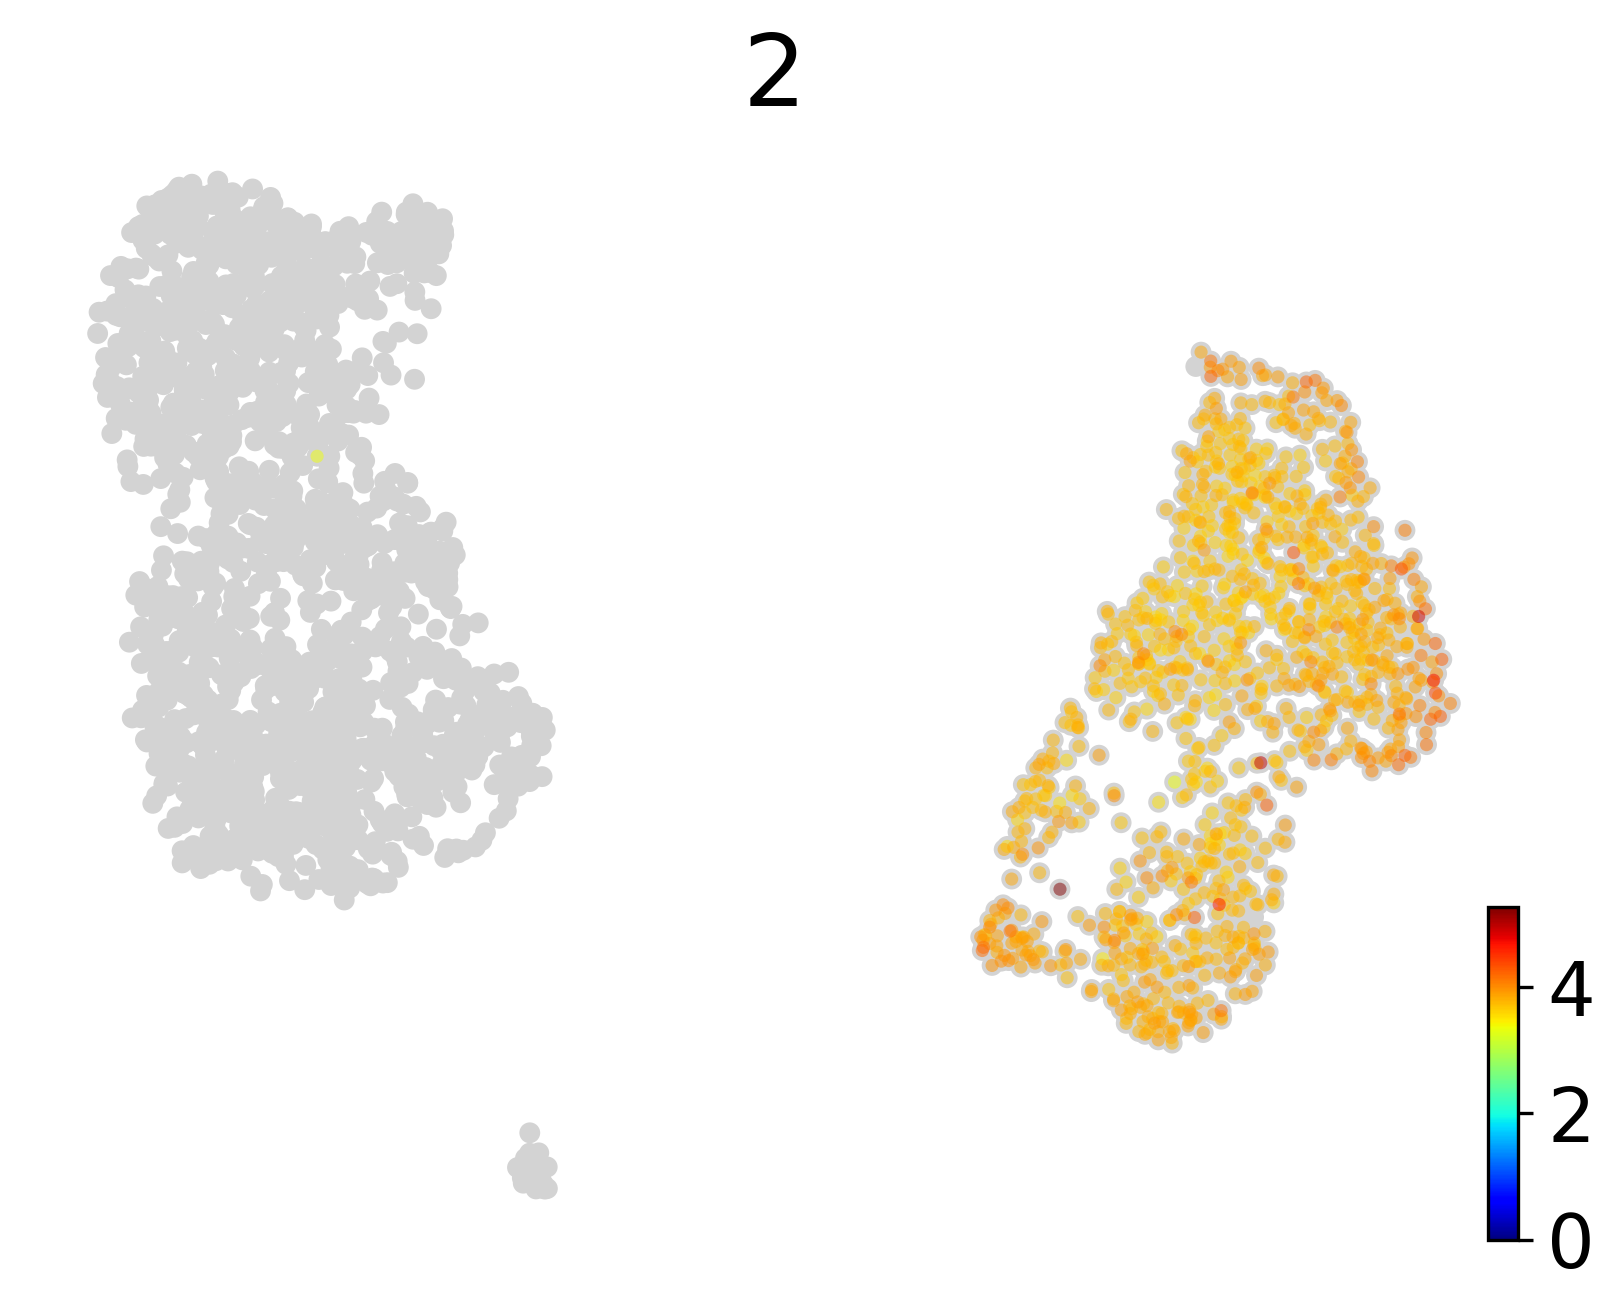

In [39]:
mb.pl.ctrp_groups(adata, groups = 'timepoints', basis = 'umap')


1 3.0342391869484735
2 3.0245767696903094


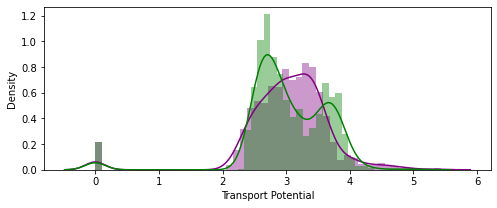

In [26]:
custom_palette = ['purple','green','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']

mb.pl.ctrp_hist(adata, groups='timepoints', bins = 50,figsize = (8,3), custom_palette=custom_palette,fname='mel_hist_pheno')



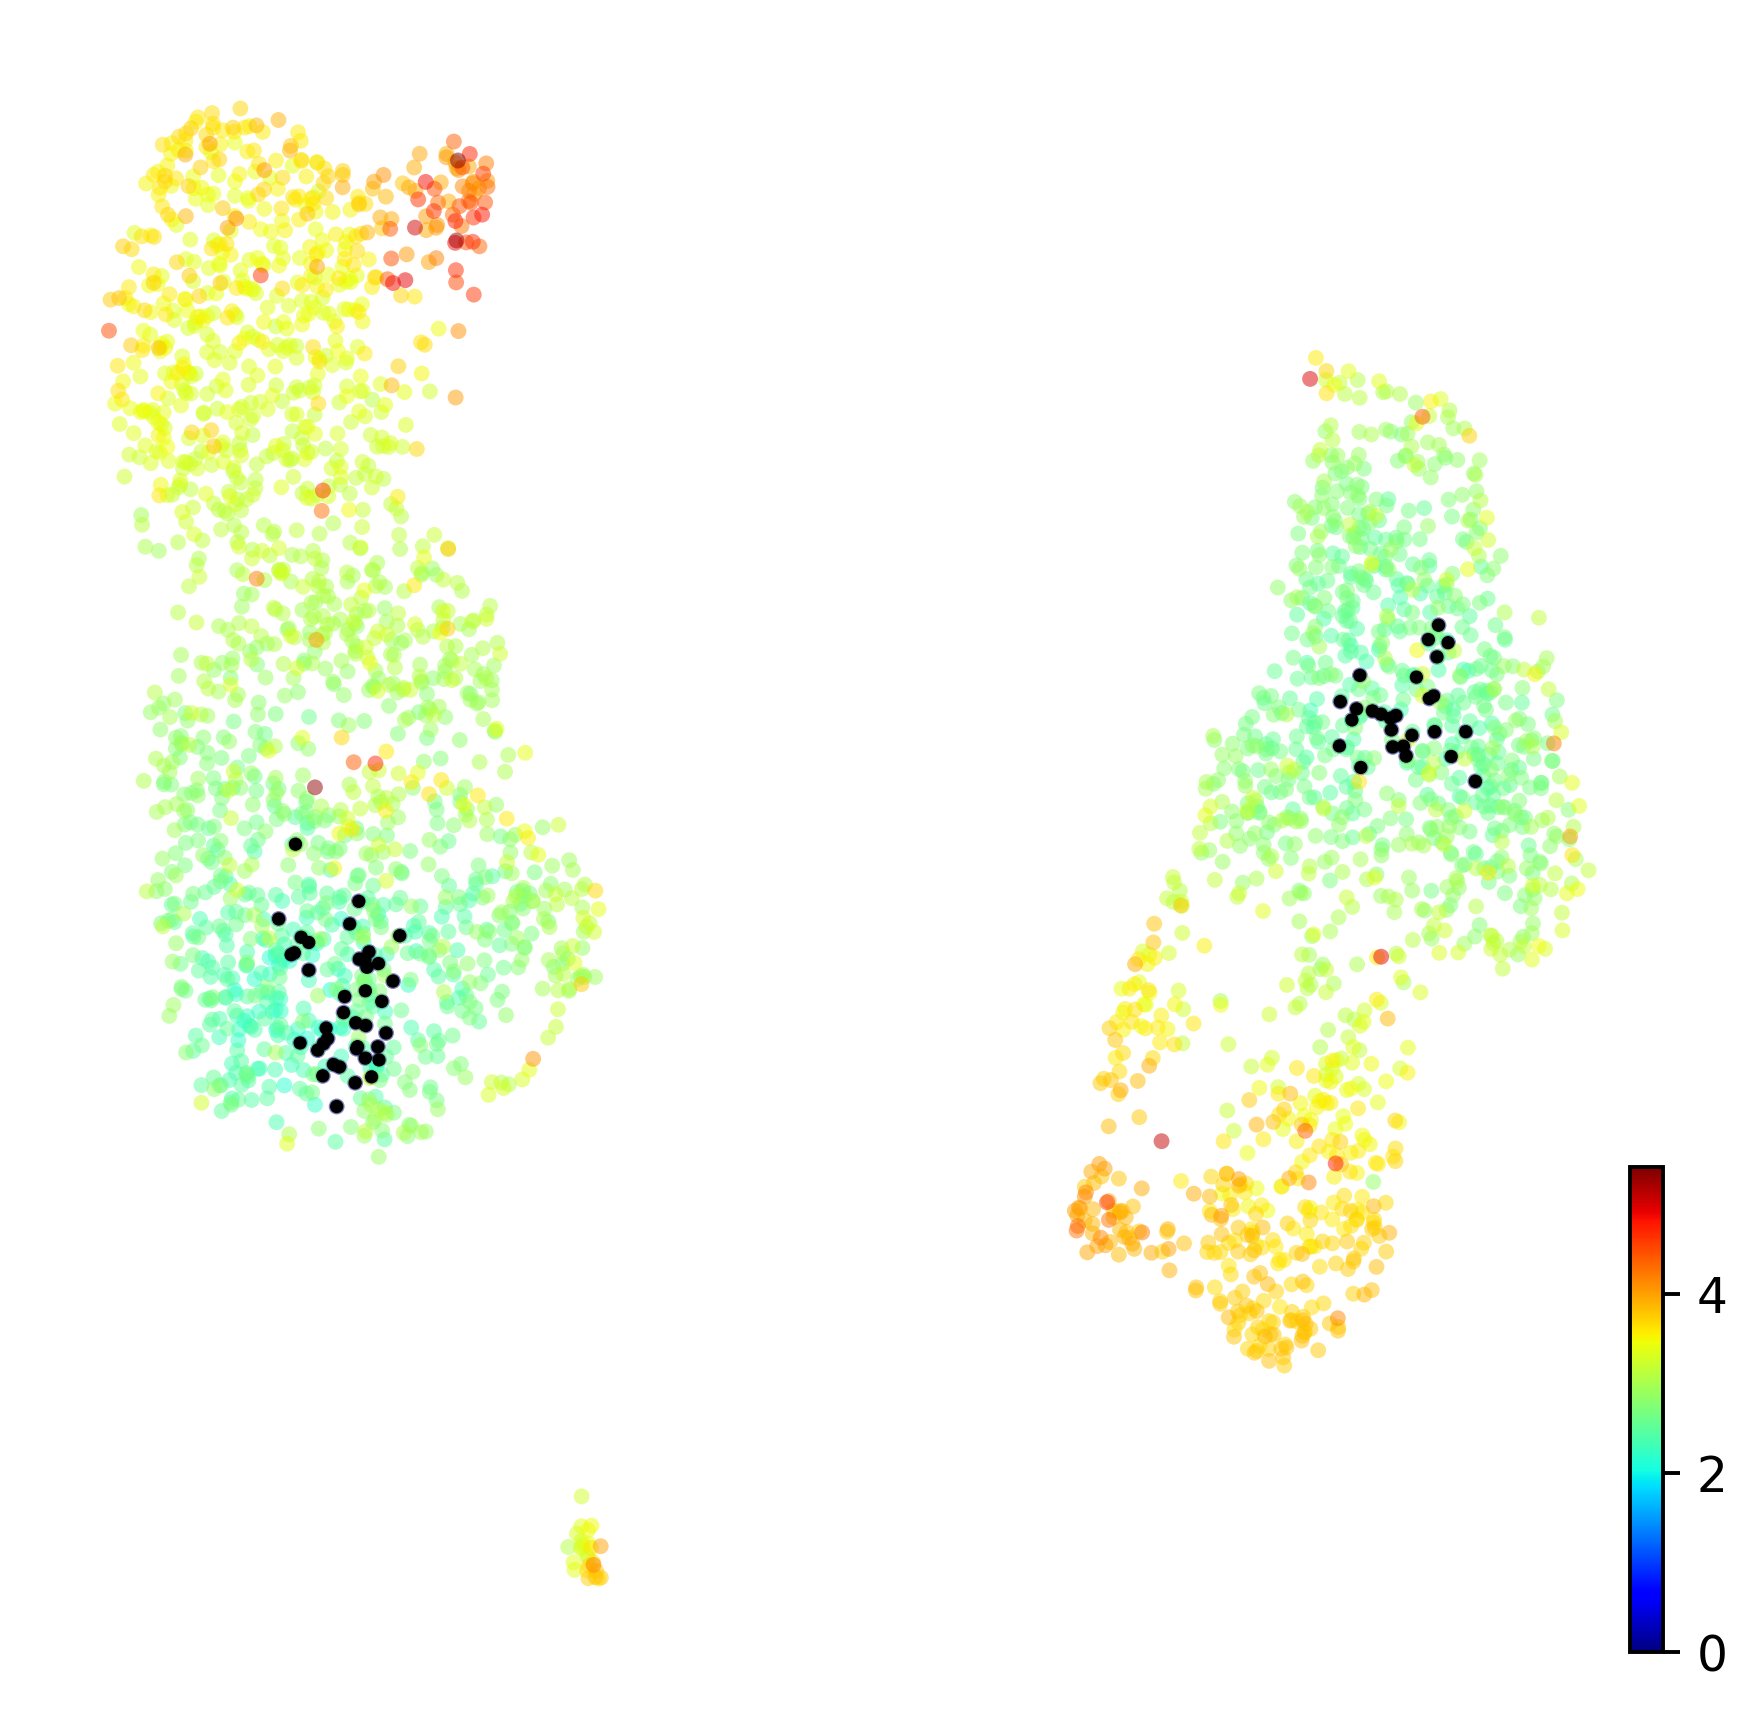

In [27]:
mb.pl.ctrp(adata, basis = 'umap')

In [28]:
adata.write_h5ad('../int/melanoma/adata04.h5ad')

In [53]:
adata = sc.read_h5ad('../int/melanoma/adata04.h5ad')

# Network inference: Imputation of time points

In [57]:
mb.pp.magic_recipe(adata, [i.capitalize() for i in tfs], 'Phenotype_filtered', fname='rpm')


Calculating MAGIC...
  Running MAGIC on 15257 cells and 21163 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 33.19 seconds.
    Calculating affinities...
    Calculated affinities in 31.84 seconds.
  Calculated graph and diffusion operator in 76.00 seconds.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 83.04 seconds.
Calculating PCA...
Calculated PCA in 9.02 seconds.
Calculating imputation...
Calculated imputation in 0.08 seconds.
